<a href="https://colab.research.google.com/github/Tdhairya2325/Movie_Recommendation-/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing DataSet***

Import the dataset and basic libraries. Check the shape of data and few initial entries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import nltk

np.random.seed(5)

movies_df = pd.read_csv('/content/drive/MyDrive/Movie_Recommendation /IMDB-Movie-Data.csv')
print(movies_df.shape)

(1000, 12)


In [ ]:
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
# adding a new column for a combined plot of both wiki and imdb

movies_df['plot'] = movies_df['Description'].astype(str)
# + '\n' + \
#                     movies_df['imdb_plot'].astype(str)
movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,plot
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,A group of intergalactic criminals are forced ...
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"Following clues to the origin of mankind, a te..."
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Three girls are kidnapped by a man with a diag...
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"In a city of humanoid animals, a hustling thea..."
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,A secret government agency recruits some of th...


# ***Tokenization and Stemming***

Tokenization is the process by which we break down articles into individual sentences or words, as needed. Besides the
tokenization method provided by NLTK, we might have to perform additional filtration to remove tokens which are entirely
numeric values or punctuation.

Stemming is the process by which we bring down a word from its different forms to the root word. This helps us establish
meaning to different forms of the same words without having to deal with each form separately. For example, the words
'fishing', 'fished', and 'fisher' all get stemmed to the word 'fish'.


In [ ]:
import re
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
def text_preprocess(text):
  tokens = [word for word in nltk.word_tokenize(text)]

  filt_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]

  stemmer = SnowballStemmer("english")
  stemmed_tokens = [stemmer.stem(word) for word in filt_tokens]
  return stemmed_tokens

ex = "Today (May 19, 2016) is his only daughter's wedding runner running ,.45.,5.4,5.4,5 giving cutter"
print(text_preprocess(ex))


['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed', 'runner', 'run', 'give', 'cutter']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df = 0.8, max_features = 200000,
                        min_df = 0.2, stop_words = 'english',

                        use_idf = True, tokenizer = text_preprocess,
                        ngram_range = (1,3))

tfidf_matrix = tfidf.fit_transform([x for x in movies_df['plot']])
print(tfidf_matrix)
tfidf_matrix.shape


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev'

  (3, 0)	1.0
  (10, 0)	1.0
  (13, 0)	1.0
  (17, 0)	1.0
  (21, 0)	1.0
  (24, 0)	1.0
  (30, 0)	1.0
  (31, 0)	1.0
  (32, 0)	1.0
  (36, 0)	1.0
  (39, 0)	1.0
  (43, 0)	1.0
  (44, 0)	1.0
  (52, 0)	1.0
  (57, 0)	1.0
  (59, 0)	1.0
  (63, 0)	1.0
  (65, 0)	1.0
  (68, 0)	1.0
  (72, 0)	1.0
  (76, 0)	1.0
  (77, 0)	1.0
  (83, 0)	1.0
  (90, 0)	1.0
  (93, 0)	1.0
  :	:
  (888, 0)	1.0
  (892, 0)	1.0
  (895, 0)	1.0
  (912, 0)	1.0
  (918, 0)	1.0
  (926, 0)	1.0
  (935, 0)	1.0
  (940, 0)	1.0
  (943, 0)	1.0
  (944, 0)	1.0
  (946, 0)	1.0
  (948, 0)	1.0
  (952, 0)	1.0
  (954, 0)	1.0
  (956, 0)	1.0
  (959, 0)	1.0
  (966, 0)	1.0
  (977, 0)	1.0
  (984, 0)	1.0
  (985, 0)	1.0
  (986, 0)	1.0
  (988, 0)	1.0
  (989, 0)	1.0
  (992, 0)	1.0
  (999, 0)	1.0


(1000, 1)

# **Visualizing**

Now, from the original DataFrame, it's very clear that one movie can be associated with more than one genre. So, using ***KMeans clustering*** wouldn't be the right choice here, because there can't be any overlapping in KMeans.

First we will try to visualize our data in 2-dimensional space using TSNE.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(tfidf_matrix.toarray())

xs = transformed[:,0]
ys = transformed[:,1]

plt.figure(figsize=(15,7))
plt.scatter(xs, ys)
plt.show()

ValueError: n_components=2 must be between 1 and min(n_samples, n_features)=1 with svd_solver='randomized'

# ***Clustering***

As we can see, the dataset doesn't have very distinguishable clusters. But we will still implement the KMeans algorithm for different k values and see if any value gives us a sharp dip in inertia.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-87a1b59ba56f>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)
<ipython-input-28-87a1b59ba56f>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)
<ipython-input-28-87a1b59ba56f>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)
<ipython-input-28-87a1b59ba56f>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)
<ipython-input-

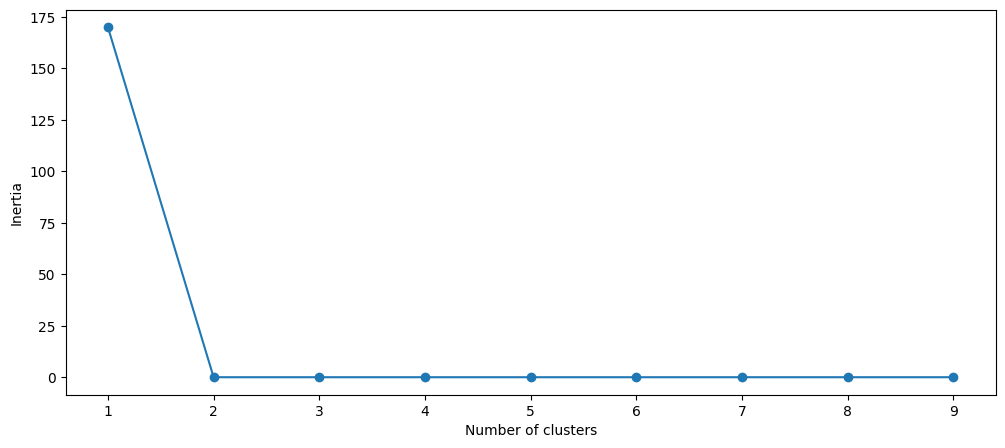

In [ ]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(tfidf_matrix)
  inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

#clusters = kmeans.labels_.tolist()
#movies_df['clusters'] = clusters
#movies_df.clusters.value_counts()

As we can see, we don't get an elbow shaped curve to determine the number of clusters. This is beacause of the fact that genres of the movies overlap. We can still find the plot similarity between movies using other methods like *Hierarchical Clustering*.

# ***Create Merging and Plot Dendrogram***

We shall now create a tree-like diagram (called a dendrogram) of the movie titles to help us understand the level of
similarity between them visually. Dendrograms help visualize the results of hierarchical clustering, which is an alternative
to k-means clustering. Two pairs of movies at the same level of hierarchical clustering are expected to have similar
strength of similarity between the corresponding pairs of movies.

We shall plot a dendrogram of the movies whose similarity measure will be given by the similarity distance we shall calculate using *cosine_similarity*. The lower the similarity distance between any two movies, the lower their linkage will make an intercept on the
y-axis.

Shape of Similarity Distance matrix is (1000, 1000)


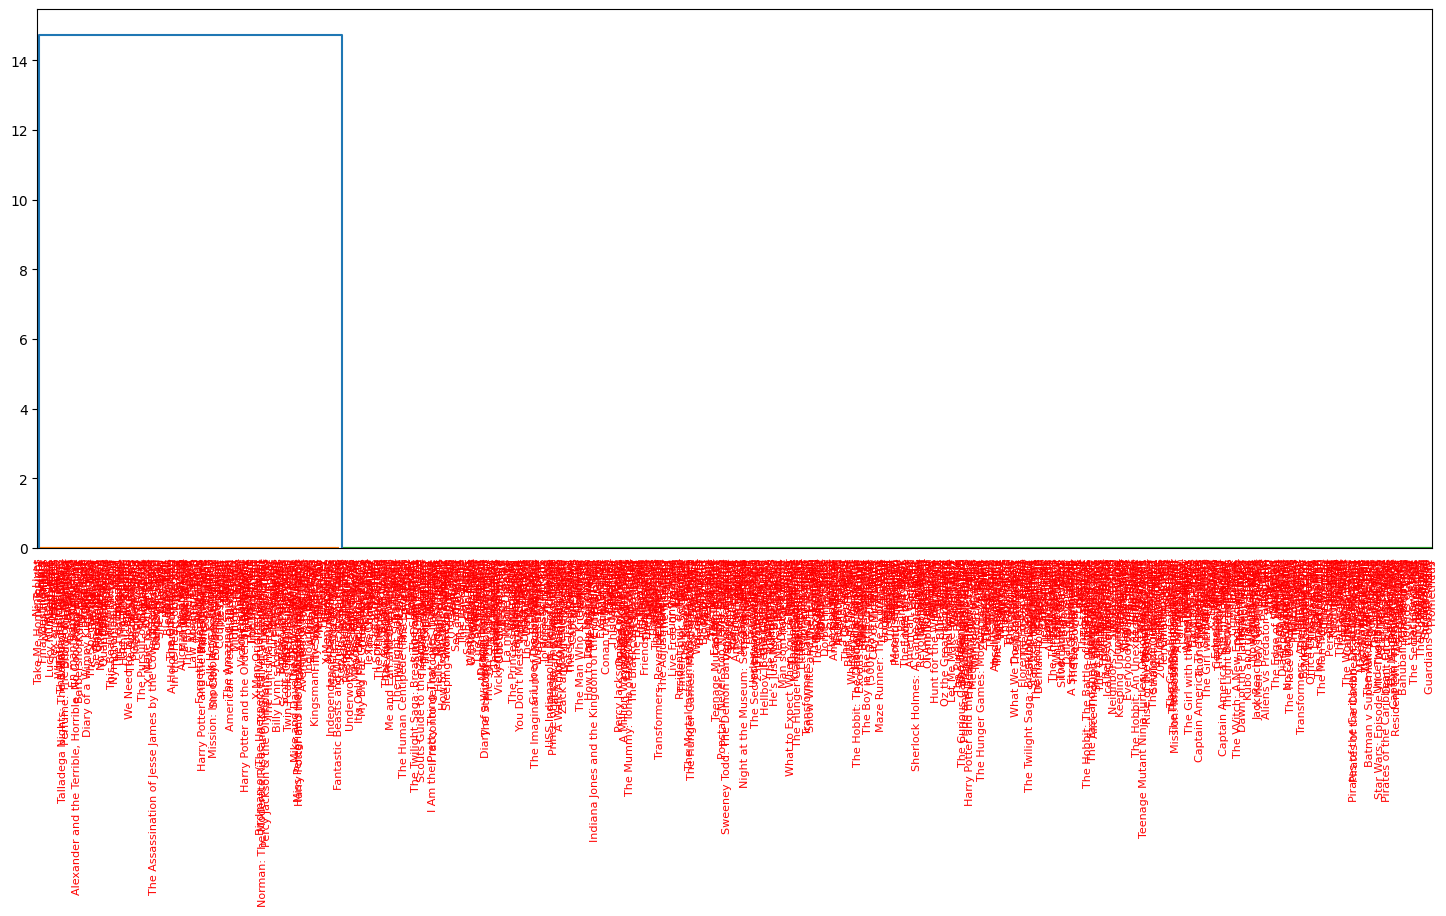

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram

similarity_distance = 1 - cosine_similarity(tfidf_matrix)
print("Shape of Similarity Distance matrix is " + str(similarity_distance.shape))

plt.figure(figsize = (18,7))
mergings = linkage(similarity_distance, method = 'complete')

dendogram_ = dendrogram(mergings, labels = [x for x in movies_df['Title']],
           leaf_rotation = 90, leaf_font_size = 8)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
#fig.set_size_inches(108, 30)


plt.show()

# ***Basic Recommender System***

Last, we will build the most basic recommender system, which will take a movie name as an input and output the 5 most closely related movies.

In [ ]:
similarity_df = pd.DataFrame(similarity_distance, columns=movies_df['Title'], index=movies_df['Title'])
watched_movie = input("Enter the movie name: ")

if similarity_df.columns.isin([str(watched_movie)]).sum() == 0:
  print("Sorry! This movie doesn't exist in our dataset!!")
else:
    similars = similarity_df.nsmallest(6, str(watched_movie)).index.to_series(
        index = range(0,6))
    print('\nThe movies similar to '+str(watched_movie)+' are: \n')
    print(similars[1:])

Enter the movie name: Bahubali: The Beginning

The movies similar to Bahubali: The Beginning are: 

1        Prometheus
2             Split
3              Sing
4     Suicide Squad
5    The Great Wall
Name: Title, dtype: object
